# Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

from skimage.filters import meijering, sato, frangi, hessian

from skimage.util import random_noise
from skimage import feature

# Global Variables

In [2]:
DATASET_PATH = Path("orumieh-handmade-dataset")

# Code

## Reading Images

In [3]:
images = DATASET_PATH.glob("*.jpeg")

images = [
    [
        image.stem,
        cv2.imread(str(image), cv2.IMREAD_GRAYSCALE)
    ]
    for image in images
]

images = sorted(images, key = lambda x: int(x[0]))

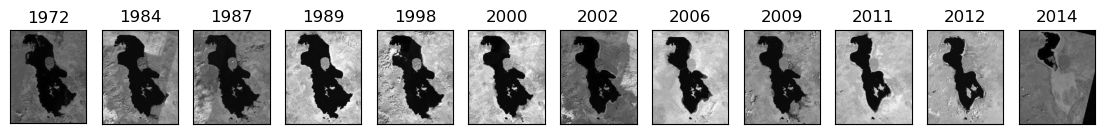

In [4]:
fig, axs = plt.subplots(1, len(images), figsize=(14, 4))

for i, (year, image) in enumerate(images):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].imshow(image_rgb)
    axs[i].set_title(year)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

In [5]:
print("Shape of each image:", images[0][1].shape)

Shape of each image: (241, 198)


## Resizing Images

In [6]:
def resize_image (raw_img, target_width):
    height, width = raw_img.shape[:2]
    aspect_ratio = height / width
    target_height = int(target_width * aspect_ratio)
    resized_img = cv2.resize(raw_img, (target_width, target_height))
    return resized_img

In [7]:
for i, (year, image) in enumerate(images):
    images[i][1] = resize_image(image, 40)

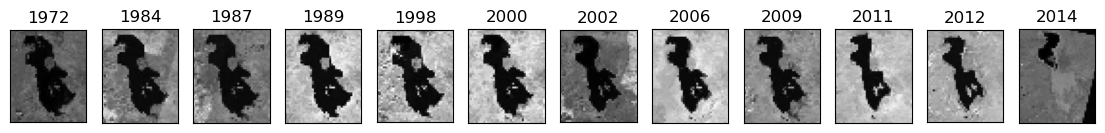

In [8]:
fig, axs = plt.subplots(1, len(images), figsize=(14, 4))

for i, (year, image) in enumerate(images):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].imshow(image_rgb)
    axs[i].set_title(year)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

In [9]:
print("Shape of each image:", images[0][1].shape)

Shape of each image: (48, 40)


## Ridge Detection

In [10]:
ridges = []

for i, (year, image) in enumerate(images):
    ridges.append(
        [
            year,
            hessian(image, black_ridges = False, sigmas = [4, 5, 6])
        ]
    )

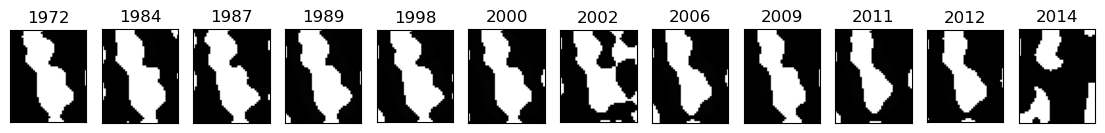

In [11]:
fig, axs = plt.subplots(1, len(ridges), figsize=(14, 4))

for i, (year, ridge) in enumerate(ridges):
    axs[i].imshow(ridge, cmap = plt.cm.gray)
    axs[i].set_title(year)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

## Edge Detection

Reference: https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html#sphx-glr-auto-examples-edges-plot-canny-py

In [12]:
edges = []

for i, (year, image) in enumerate(images):
    edges.append(
        [
            year,
            feature.canny(image, sigma = 2)
        ]
    )

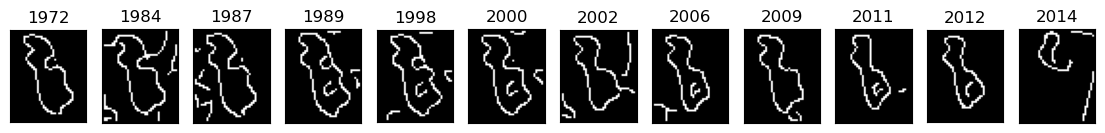

In [13]:
fig, axs = plt.subplots(1, len(edges), figsize=(14, 4))

for i, (year, edge) in enumerate(edges):
    axs[i].imshow(edge, cmap = plt.cm.gray)
    axs[i].set_title(year)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()